## Executive Summary

This project analyzes the Brazilian Olist e-commerce platform using transactional data from 2016–2018.
The analysis focuses on sales performance, customer behavior, payment methods, and product categories.

Key findings include:
- Strong growth in both order volume and revenue over time.
- Low customer repeat purchase rate, indicating retention challenges.
- Clear temporal and regional purchasing patterns.
- Sales concentration in a small number of product categories and regions.

The insights can support strategic decisions in marketing, logistics, and product prioritization.


## 2. Data Overview & Quality Check

In this section, we perform an initial exploratory data analysis (EDA) to understand the size, structure, and quality of the dataset before conducting further analysis.


In [1]:
import pandas as pd


In [2]:
orders = pd.read_csv("../data/raw/olist_orders_dataset.csv")


In [3]:
orders.shape


(99441, 8)

In [4]:
order_items = pd.read_csv("../data/raw/olist_order_items_dataset.csv")
payments = pd.read_csv("../data/raw/olist_order_payments_dataset.csv")


In [5]:
orders.shape, order_items.shape, payments.shape


((99441, 8), (112650, 7), (103886, 5))

In [11]:
import pandas as pd

summary = pd.DataFrame({
    "dataset": ["orders", "order_items", "payments"],
    "rows": [orders.shape[0], order_items.shape[0], payments.shape[0]],
    "columns": [orders.shape[1], order_items.shape[1], payments.shape[1]],
    "missing_values": [
        orders.isnull().sum().sum(),
        order_items.isnull().sum().sum(),
        payments.isnull().sum().sum()
    ]
})

summary


,dataset,rows,columns,missing_values
0,orders,99441,8,4908
1,order_items,112650,7,0
2,payments,103886,5,0


In [6]:
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
orders["order_purchase_timestamp"] = pd.to_datetime(
    orders["order_purchase_timestamp"]
)


In [8]:
orders["order_purchase_timestamp"].min(), orders["order_purchase_timestamp"].max()


(Timestamp('2016-09-04 21:15:19'), Timestamp('2018-10-17 17:30:18'))

In [9]:
orders.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### Summary

The dataset contains 99,441 orders covering the period from September 2016 to October 2018. 
Key identifiers and timestamps contain no missing values. 
Missing values are primarily observed in delivery-related timestamps, which is expected due to order cancellations or incomplete deliveries. 
Overall, the data quality is sufficient for further sales and customer analysis.


## 3. Sales Performance Analysis

### Objective
The objective of this section is to evaluate Olist’s overall sales performance and understand how revenue and order volume have evolved over time.

### Key Business Questions
In this section, we aim to answer the following questions:

- What is the total revenue generated on the Olist platform?
- How has sales performance changed over time?
- Are there any observable growth or seasonality patterns?
- Which periods (months) show the best and worst performance?

In [12]:
payments.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [13]:
payments.describe()


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Total Revenue

Total revenue represents the overall sales value generated on the platform during the observed period.
This metric provides a high-level view of the business scale.

In [15]:
total_revenue = order_items["price"].sum()
total_revenue


13591643.700000003

### Order Volume

Order count indicates how many unique purchase transactions occurred.
Together with revenue, it helps distinguish between volume-driven and price-driven growth.

In [17]:
total_orders = orders["order_id"].nunique()
total_orders


99441

### Time Feature Engineering

The order purchase timestamp is converted into a datetime format.
A year-month field is created to support monthly trend analysis.


In [18]:
orders["order_purchase_timestamp"] = pd.to_datetime(
    orders["order_purchase_timestamp"]
)

orders["year_month"] = orders["order_purchase_timestamp"].dt.to_period("M")


### Dataset Integration

Order-level information is merged with item-level pricing data to enable time-based revenue analysis.


In [19]:
sales_df = orders.merge(
    order_items,
    on="order_id",
    how="inner"
)


### Monthly Revenue

Monthly revenue is calculated by aggregating item prices by purchase month.
This allows us to observe long-term growth and seasonal patterns.


In [26]:
monthly_revenue = (
    sales_df
    .groupby("year_month")["price"]
    .sum()
    .reset_index()
)

monthly_revenue


,year_month,price
0,2016-09,267.36
1,2016-10,49507.66
2,2016-12,10.90
3,2017-01,120312.87
4,2017-02,247303.02
5,2017-03,374344.30
6,2017-04,359927.23
7,2017-05,506071.14
8,2017-06,433038.60
9,2017-07,498031.48


### Revenue Trend Interpretation

### Monthly Revenue Trend Interpretation

The chart illustrates the evolution of monthly revenue on the Olist platform over time.
Overall, revenue shows a clear upward trend, indicating sustained growth in e-commerce activity.

Short-term fluctuations are observed, which may be influenced by seasonal effects or variations in customer purchasing behaviour.



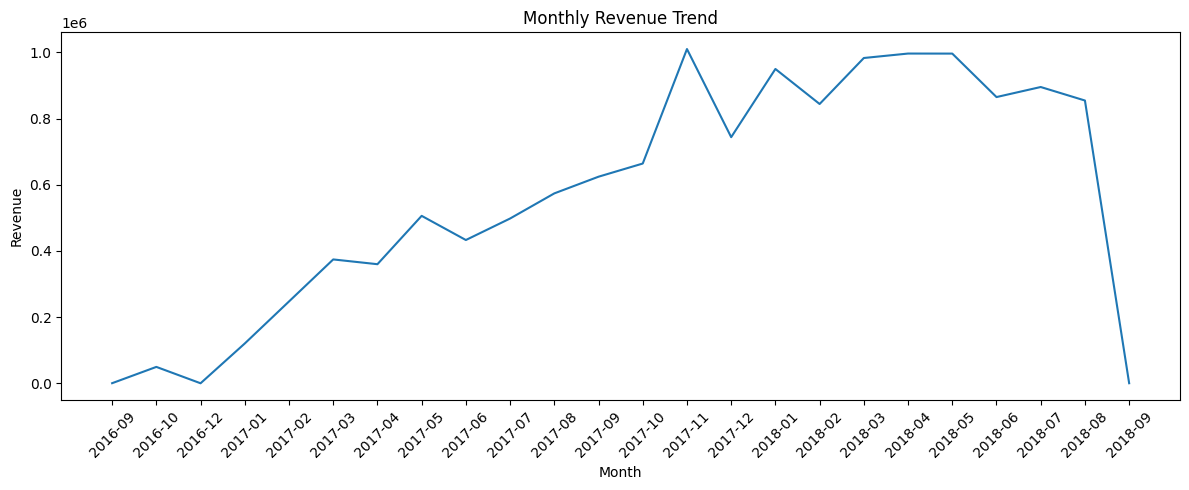

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.plot(
    monthly_revenue["year_month"].astype(str),
    monthly_revenue["price"]
)

plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Key Findings from Sales Performance Analysis

- The platform generates significant revenue over the observed period.
- Monthly revenue analysis reveals clear temporal patterns.
- Sales performance evaluation provides a foundation for deeper customer behaviour analysis in the next section.


Order Volume Trend

In [21]:
monthly_orders = (
    orders
    .groupby("year_month")["order_id"]
    .nunique()
    .reset_index(name="order_count")
)

monthly_orders


,year_month,order_count
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


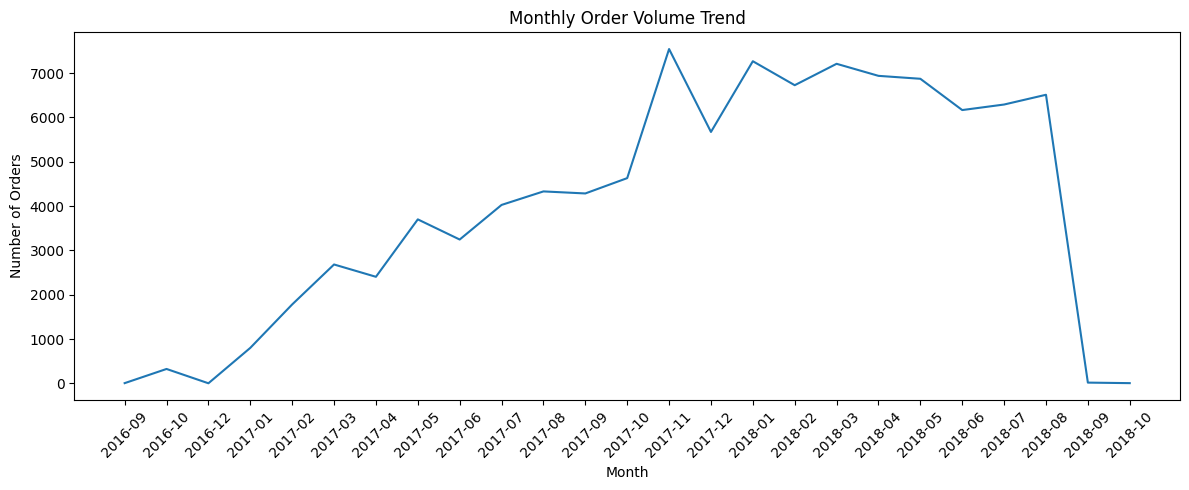

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(
    monthly_orders["year_month"].astype(str),
    monthly_orders["order_count"]
)

plt.title("Monthly Order Volume Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Monthly Order Volume Trend Interpretation

The monthly order volume shows a clear upward trend throughout most of the observed period.
This indicates a steady increase in customer adoption and usage of the Olist e-commerce platform.

The sharp decline at the end of the timeline is likely due to incomplete data for the final month rather than a real decrease in demand.


## 4. Customer Behaviour Analysis

This section focuses on understanding customer purchasing behaviour on the Olist platform.
The analysis explores repeat purchases and customer contribution to overall sales performance.

In [28]:
customer_order_counts = (
    orders
    .groupby("customer_id")["order_id"]
    .nunique()
    .reset_index(name="order_count")
)

customer_order_counts.head()


,customer_id,order_count
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


In [29]:
customer_order_counts["order_count"].value_counts().sort_index()


order_count
1    99441
Name: count, dtype: int64

The distribution shows that most customers placed only one order.
This indicates a low repeat purchase rate and suggests that customer retention
could be a key area for business improvement.


In [30]:
customer_order_counts["is_repeat"] = customer_order_counts["order_count"] > 1
customer_order_counts["is_repeat"].value_counts(normalize=True)


is_repeat
False    1.0
Name: proportion, dtype: float64

In [36]:
orders_customers = orders.merge(
    customers[["customer_id", "customer_unique_id"]],
    on="customer_id",
    how="left"
)


In [37]:
orders_customers[["customer_id", "customer_unique_id"]].head()


,customer_id,customer_unique_id
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6


In [38]:
customer_order_counts = (
    orders_customers
        .groupby("customer_unique_id")["order_id"]
        .nunique()
        .reset_index(name="order_count")
)


In [39]:
customer_order_counts["order_count"].value_counts().sort_index()


order_count
1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64

In [40]:
customer_order_counts["is_repeat"] = customer_order_counts["order_count"] > 1

customer_order_counts["is_repeat"].value_counts(normalize=True)


is_repeat
False    0.968812
True     0.031188
Name: proportion, dtype: float64

### Customer Repeat Purchase Analysis

To analyse customer loyalty, we evaluate how many unique orders each customer
placed using the customer_unique_id.

The results show that the majority of customers placed only one order,
indicating a low repeat purchase rate on the platform.

This suggests that customer retention and repeat purchase strategies
could be a key area for business growth.


### Time-based Purchasing Behaviour

This section explores when customers are most likely to place orders,
focusing on day-of-week and time-of-day patterns.


In [41]:
# 从下单时间提取星期几
orders["order_purchase_dayofweek"] = orders["order_purchase_timestamp"].dt.dayofweek


In [42]:
day_map = {
    0: "Mon",
    1: "Tue",
    2: "Wed",
    3: "Thu",
    4: "Fri",
    5: "Sat",
    6: "Sun"
}

orders["order_purchase_day"] = orders["order_purchase_dayofweek"].map(day_map)


In [43]:
orders_by_day = (
    orders
        .groupby("order_purchase_day")["order_id"]
        .count()
        .reindex(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
)
orders_by_day


order_purchase_day
Mon    16196
Tue    15963
Wed    15552
Thu    14761
Fri    14122
Sat    10887
Sun    11960
Name: order_id, dtype: int64

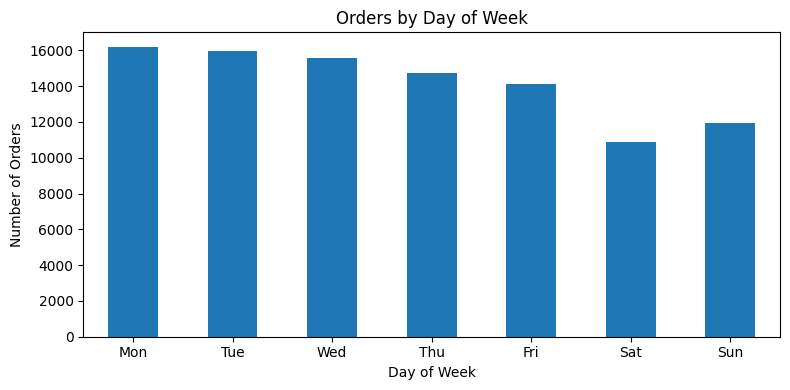

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
orders_by_day.plot(kind="bar")
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Orders by Day of Week

This analysis examines how customer purchasing behaviour varies across different days of the week.

The results show clear differences in order volume between weekdays and weekends, which can inform marketing campaign timing and operational planning.


In [45]:
orders["order_purchase_hour"] = orders["order_purchase_timestamp"].dt.hour


In [46]:
def time_period(hour):
    if 0 <= hour < 6:
        return "Dawn"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Night"

orders["time_period"] = orders["order_purchase_hour"].apply(time_period)


In [47]:
orders_by_time = (
    orders
        .groupby("time_period")["order_id"]
        .count()
        .reindex(["Dawn","Morning","Afternoon","Night"])
)

orders_by_time


time_period
Dawn          4740
Morning      22240
Afternoon    38361
Night        34100
Name: order_id, dtype: int64

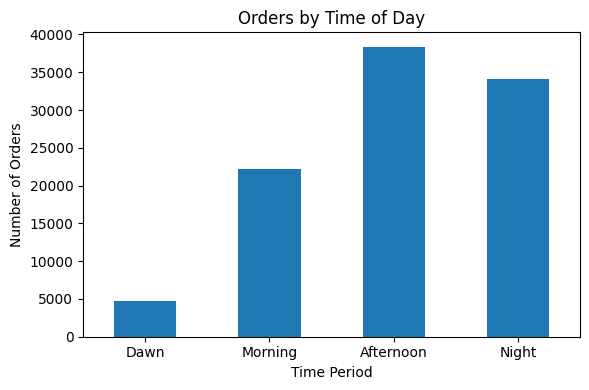

In [48]:
plt.figure(figsize=(6,4))
orders_by_time.plot(kind="bar")
plt.title("Orders by Time of Day")
plt.xlabel("Time Period")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Orders by Time of Day

This section analyses customer purchasing behaviour across different periods of the day.

The results indicate clear preferences in ordering time, which can support targeted promotions and system load optimisation.


In [49]:
orders["order_year"] = orders["order_purchase_timestamp"].dt.year
orders["order_month"] = orders["order_purchase_timestamp"].dt.month


In [50]:
yoy_orders = (
    orders[orders["order_year"].isin([2017, 2018])]
        .groupby(["order_year", "order_month"])["order_id"]
        .count()
        .reset_index()
)
yoy_orders.head()


,order_year,order_month,order_id
0,2017,1,800
1,2017,2,1780
2,2017,3,2682
3,2017,4,2404
4,2017,5,3700


In [51]:
orders_2017 = yoy_orders[yoy_orders["order_year"] == 2017]
orders_2018 = yoy_orders[yoy_orders["order_year"] == 2018]


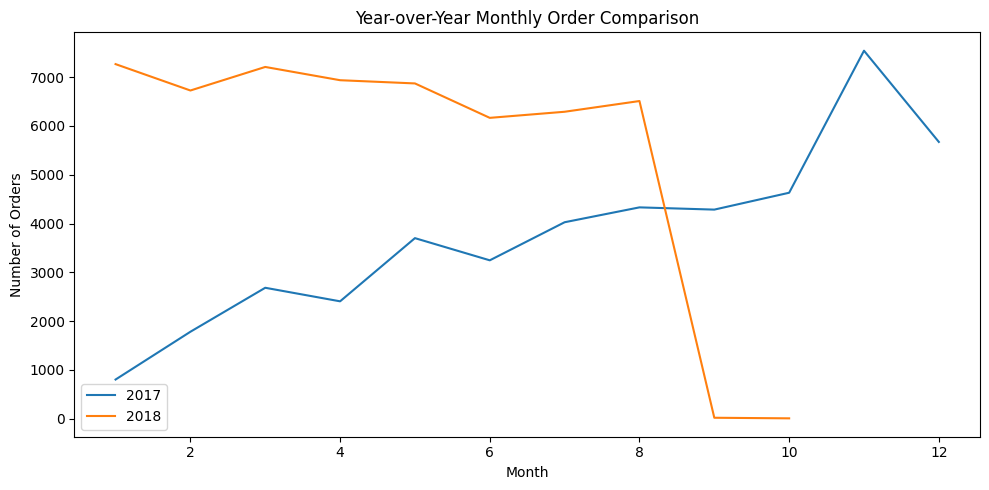

In [52]:
plt.figure(figsize=(10,5))
plt.plot(orders_2017["order_month"], orders_2017["order_id"], label="2017")
plt.plot(orders_2018["order_month"], orders_2018["order_id"], label="2018")

plt.title("Year-over-Year Monthly Order Comparison")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.legend()
plt.tight_layout()
plt.show()


### Year-over-Year Order Growth

A year-over-year comparison between 2017 and 2018 reveals a clear increase in monthly order volume.

This growth indicates strong expansion of the e-commerce platform and increasing customer adoption over time.


### 5 Payment Method Distribution

This analysis examines the distribution of orders across different payment methods.

The results reveal customer preferences in payment behaviour, which can guide payment system optimisation and risk management strategies.


In [53]:
payments.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [54]:
payment_type_counts = (
    payments
        .groupby("payment_type")["order_id"]
        .nunique()
        .sort_values(ascending=False)
)

payment_type_counts


payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

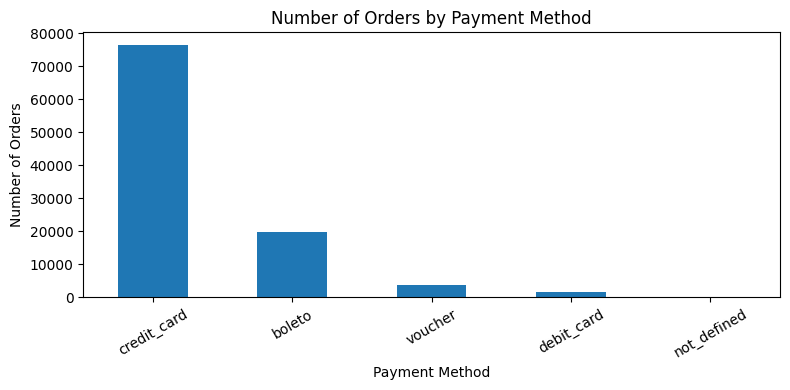

In [55]:
plt.figure(figsize=(8,4))
payment_type_counts.plot(kind="bar")
plt.title("Number of Orders by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Orders")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [56]:
avg_payment_by_type = (
    payments
        .groupby("payment_type")["payment_value"]
        .mean()
        .sort_values(ascending=False)
)

avg_payment_by_type


payment_type
credit_card    163.319021
boleto         145.034435
debit_card     142.570170
voucher         65.703354
not_defined      0.000000
Name: payment_value, dtype: float64

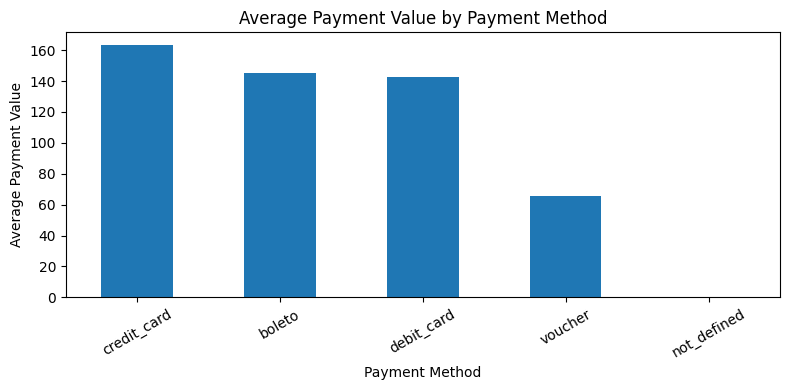

In [58]:
plt.figure(figsize=(8,4))
avg_payment_by_type.plot(kind="bar")
plt.title("Average Payment Value by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Average Payment Value")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Average Payment Value by Method

This analysis compares the average transaction value across different payment methods.

The results indicate that certain payment methods are associated with higher-value purchases, suggesting differences in customer spending behaviour.


### Orders by State

This section analyses the geographic distribution of customer orders across Brazilian states.

The results show a strong concentration of orders in a small number of states, highlighting key regional markets for the platform.


In [59]:
orders_customers = orders.merge(
    customers[["customer_id", "customer_state"]],
    on="customer_id",
    how="left"
)


In [60]:
orders_by_state = (
    orders_customers
        .groupby("customer_state")["order_id"]
        .count()
        .sort_values(ascending=False)
)

orders_by_state.head(10)


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

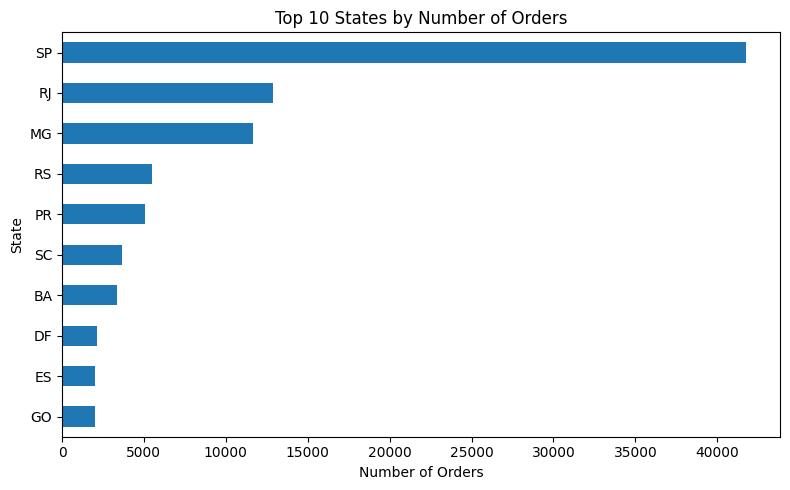

In [61]:
plt.figure(figsize=(8,5))
orders_by_state.head(10).plot(kind="barh")
plt.title("Top 10 States by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("State")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Revenue Distribution by State

This analysis highlights how total sales revenue is distributed across different states.

While some regions generate a high number of orders, revenue concentration reveals the most financially significant markets.


In [62]:
sales_customers = sales_df.merge(
    customers[["customer_id", "customer_state"]],
    on="customer_id",
    how="left"
)


In [63]:
revenue_by_state = (
    sales_customers
        .groupby("customer_state")["price"]
        .sum()
        .sort_values(ascending=False)
)

revenue_by_state.head(10)


customer_state
SP    5202955.05
RJ    1824092.67
MG    1585308.03
RS     750304.02
PR     683083.76
SC     520553.34
BA     511349.99
DF     302603.94
GO     294591.95
ES     275037.31
Name: price, dtype: float64

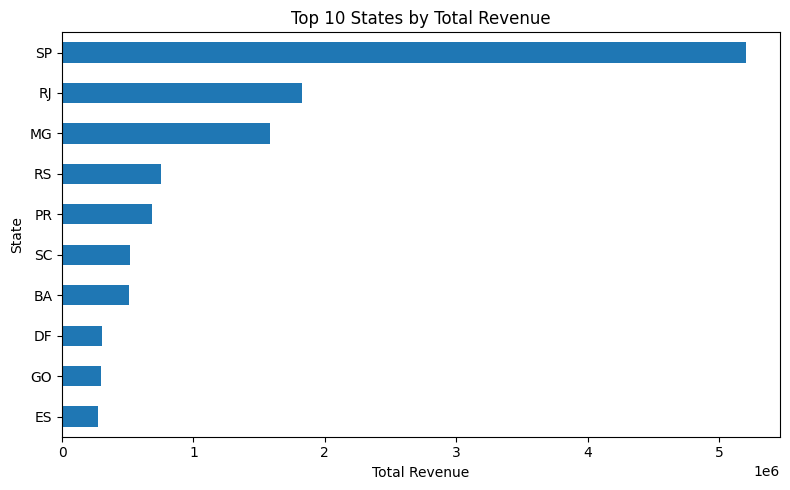

In [64]:
plt.figure(figsize=(8,5))
revenue_by_state.head(10).plot(kind="barh")
plt.title("Top 10 States by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("State")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 6 Orders by Product Category

In [66]:
import pandas as pd

products = pd.read_csv(
    "../data/raw/olist_products_dataset.csv"
)

products.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [67]:
order_items_products = order_items.merge(
    products[["product_id", "product_category_name"]],
    on="product_id",
    how="left"
)

order_items_products.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim


In [68]:
order_items_products["product_category_name"].isna().mean()


0.014229915667998225

In [ ]:
order_items_products = order_items_products.merge(
    category_translation,
    on="product_category_name",
    how="left"
)

order_items_products.head()


In [70]:
category_translation = pd.read_csv(
    "../data/raw/product_category_name_translation.csv"
)

category_translation.head()


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [71]:
order_items_products.columns


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name'],
      dtype='object')

In [72]:
order_items_products = order_items_products.merge(
    category_translation[
        ["product_category_name", "product_category_name_english"]
    ],
    on="product_category_name",
    how="left"
)

order_items_products.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools


In [73]:
order_items_products["product_category_name_english"].isna().mean()


0.014442964935641367

In [74]:
orders_by_category = (
    order_items_products
        .groupby("product_category_name_english")["order_id"]
        .nunique()
        .sort_values(ascending=False)
)

orders_by_category.head(10)


product_category_name_english
bed_bath_table           9417
health_beauty            8836
sports_leisure           7720
computers_accessories    6689
furniture_decor          6449
housewares               5884
watches_gifts            5624
telephony                4199
auto                     3897
toys                     3886
Name: order_id, dtype: int64

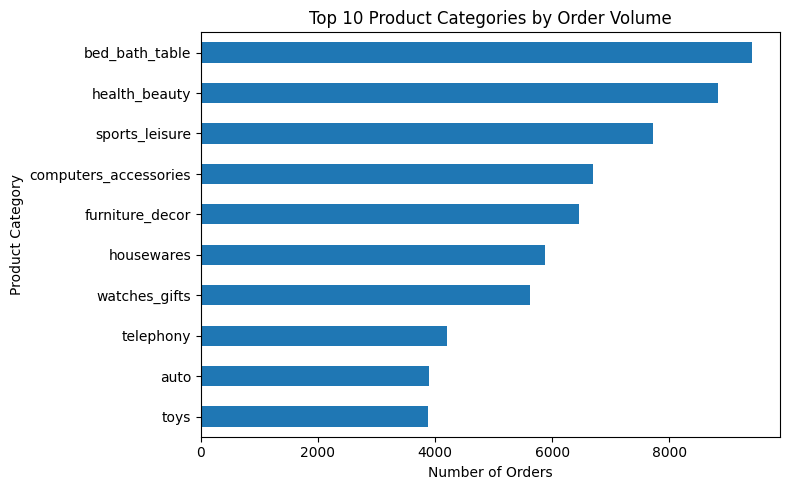

In [75]:
plt.figure(figsize=(8,5))
orders_by_category.head(10).plot(kind="barh")
plt.title("Top 10 Product Categories by Order Volume")
plt.xlabel("Number of Orders")
plt.ylabel("Product Category")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Orders by Product Category

This analysis examines the number of orders across different product categories.

The results highlight the most popular categories in terms of customer demand, providing insight into consumer preferences.


In [76]:
revenue_by_category = (
    order_items_products
        .groupby("product_category_name_english")["price"]
        .sum()
        .sort_values(ascending=False)
)

revenue_by_category.head(10)


product_category_name_english
health_beauty            1258681.34
watches_gifts            1205005.68
bed_bath_table           1036988.68
sports_leisure            988048.97
computers_accessories     911954.32
furniture_decor           729762.49
cool_stuff                635290.85
housewares                632248.66
auto                      592720.11
garden_tools              485256.46
Name: price, dtype: float64

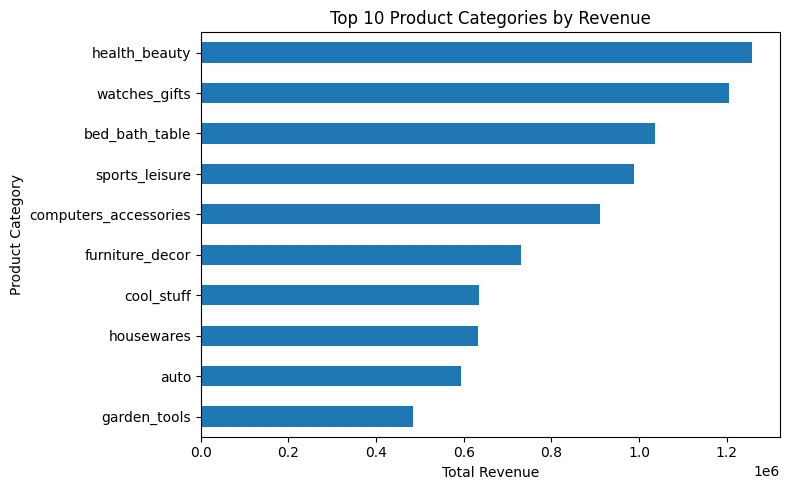

In [77]:
plt.figure(figsize=(8,5))
revenue_by_category.head(10).plot(kind="barh")
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Revenue by Product Category

This section analyses total sales revenue by product category.

It identifies the categories that contribute the most to overall revenue, which may differ from those with the highest order volume.


In [78]:
category_summary = (
    order_items_products
        .groupby("product_category_name_english")
        .agg(
            order_count=("order_id", "nunique"),
            total_revenue=("price", "sum")
        )
        .sort_values("order_count", ascending=False)
)

category_summary.head()


,order_count,total_revenue
product_category_name_english,,
bed_bath_table,9417,1036988.68
health_beauty,8836,1258681.34
sports_leisure,7720,988048.97
computers_accessories,6689,911954.32
furniture_decor,6449,729762.49


In [79]:
category_summary["avg_order_value"] = (
    category_summary["total_revenue"] / category_summary["order_count"]
)

category_summary.sort_values("avg_order_value", ascending=False).head(10)


,order_count,total_revenue,avg_order_value
product_category_name_english,,,
computers,181,222963.13,1231.840497
small_appliances_home_oven_and_coffee,75,47445.71,632.609467
home_appliances_2,234,113317.74,484.263846
agro_industry_and_commerce,182,72530.47,398.519066
musical_instruments,628,191498.88,304.934522
small_appliances,630,190648.58,302.616794
fixed_telephony,217,59583.00,274.576037
construction_tools_safety,167,40544.52,242.781557
air_conditioning,253,55024.96,217.489960


### Category Performance Comparison

By comparing order volume and total revenue, we observe that high sales volume does not always correspond to high revenue.

Some categories generate fewer orders but higher average order values, indicating premium or higher-priced products.


### Top Products Analysis

In [80]:
top_products = (
    order_items_products
        .groupby("product_id")["order_id"]
        .count()
        .sort_values(ascending=False)
        .head(10)
)

top_products


product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: order_id, dtype: int64

In [81]:
top_products_revenue = (
    order_items_products
        .groupby("product_id")["price"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
)

top_products_revenue


product_id
bb50f2e236e5eea0100680137654686c    63885.00
6cdd53843498f92890544667809f1595    54730.20
d6160fb7873f184099d9bc95e30376af    48899.34
d1c427060a0f73f6b889a5c7c61f2ac4    47214.51
99a4788cb24856965c36a24e339b6058    43025.56
3dd2a17168ec895c781a9191c1e95ad7    41082.60
25c38557cf793876c5abdd5931f922db    38907.32
5f504b3a1c75b73d6151be81eb05bdc9    37733.90
53b36df67ebb7c41585e8d54d6772e08    37683.42
aca2eb7d00ea1a7b8ebd4e68314663af    37608.90
Name: price, dtype: float64

### Top Products Analysis

This section identifies the top-performing individual products based on order volume and total revenue.

The findings highlight key products that drive sales and revenue, which can inform inventory planning and promotional strategies.


In [84]:
import os
os.getcwd()


'c:\\olist-da-project\\notebooks'

In [85]:
sales_df = orders.merge(
    order_items,
    on="order_id",
    how="inner"
)


In [86]:
sales_df.head()
sales_df.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'year_month', 'order_purchase_dayofweek', 'order_purchase_day',
       'order_purchase_hour', 'time_period', 'order_year', 'order_month',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value'],
      dtype='object')

In [87]:
monthly_sales = (
    sales_df
    .groupby("year_month")
    .agg(
        total_revenue=("price", "sum"),
        order_count=("order_id", "nunique")
    )
    .reset_index()
)


In [88]:
monthly_sales.to_csv(
    "../data/processed/monthly_sales.csv",
    index=False
)


In [89]:
order_items_products = (
    order_items
    .merge(products[["product_id", "product_category_name"]], on="product_id", how="left")
    .merge(category_translation, on="product_category_name", how="left")
)


In [90]:
category_sales = (
    order_items_products
    .groupby("product_category_name_english")
    .agg(
        total_revenue=("price", "sum"),
        order_count=("order_id", "nunique"),
        item_count=("order_item_id", "count")
    )
    .reset_index()
    .sort_values("total_revenue", ascending=False)
)


In [91]:
category_sales.to_csv(
    "../data/processed/category_sales.csv",
    index=False
)


In [94]:
import pandas as pd

order_payments = pd.read_csv(
    "../data/raw/olist_order_payments_dataset.csv"
)

order_payments.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [95]:
payment_summary = (
    order_payments
    .groupby("payment_type")
    .agg(
        total_payment=("payment_value", "sum"),
        order_count=("order_id", "nunique")
    )
    .reset_index()
    .sort_values("total_payment", ascending=False)
)


In [96]:
payment_summary.to_csv(
    "../data/processed/payment_summary.csv",
    index=False
)


In [97]:
orders_customers = orders.merge(
    customers[["customer_id", "customer_state", "customer_city"]],
    on="customer_id",
    how="left"
)


In [98]:
orders_items_customers = orders_customers.merge(
    order_items,
    on="order_id",
    how="inner"
)


In [99]:
state_sales = (
    orders_items_customers
    .groupby("customer_state")
    .agg(
        total_revenue=("price", "sum"),
        order_count=("order_id", "nunique")
    )
    .reset_index()
    .sort_values("total_revenue", ascending=False)
)


In [100]:
state_sales.to_csv(
    "../data/processed/state_sales.csv",
    index=False
)


In [101]:
city_sales = (
    orders_items_customers
    .groupby("customer_city")
    .agg(
        total_revenue=("price", "sum"),
        order_count=("order_id", "nunique")
    )
    .reset_index()
    .sort_values("order_count", ascending=False)
    .head(10)
)


In [110]:
city_sales.to_csv(
    "../data/processed/city_sales_top10.csv",
    index=False
)


In [103]:
import pandas as pd

order_reviews = pd.read_csv(
    "../data/raw/olist_order_reviews_dataset.csv"
)

order_reviews.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [104]:
order_reviews.columns


Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [105]:
['review_id',
 'order_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp']


['review_id',
 'order_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp']

In [106]:
review_score_dist = (
    order_reviews
    .groupby("review_score")
    .agg(review_count=("review_id", "count"))
    .reset_index()
    .sort_values("review_score")
)

review_score_dist


,review_score,review_count
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


In [111]:
review_score_dist = (
    order_reviews
    .groupby("review_score")
    .agg(review_count=("review_id", "count"))
    .reset_index()
    .sort_values("review_score")
)


In [112]:
review_score_dist.to_csv(
    "../data/processed/review_score_distribution.csv",
    index=False
)


In [107]:
reviews_orders_items = (
    order_reviews
    .merge(order_items_products, on="order_id", how="left")
)


In [108]:
category_rating = (
    reviews_orders_items
    .groupby("product_category_name_english")
    .agg(
        avg_rating=("review_score", "mean"),
        review_count=("review_id", "count")
    )
    .reset_index()
    .sort_values("avg_rating", ascending=False)
)


In [109]:
category_rating.to_csv(
    "../data/processed/category_rating.csv",
    index=False
)
